In [23]:
# deep neural network used to classify non-linear dataset into 2 discrete  binary classes
import numpy as np 
import matplotlib.pyplot as plt
import keras
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [24]:
np.random.seed(0)

In [25]:
n_pts = 500
# store points as X and labels as y so every data point has a corresponding label for training
# use sklearn dataset to make a outer circle representing the negative region (0) and inner circle for positive region (1)
X, y = datasets.make_circles(n_samples = n_pts, random_state = 123, noise = 0.1, factor = 0.2)

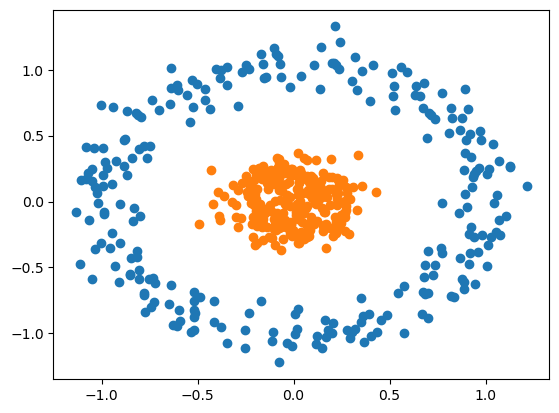

In [26]:
# plot the negative region horizontal points and then plot vertical points which correspond to zero using a boolean check
plt.scatter(X[y==0, 0], X[y==0, 1])
# same for the positive region
plt.scatter(X[y==1, 0], X[y==1, 1])

In [41]:
# create the deep neural network where all nodes are connected i.e. input to hidden to output layer nodes (each node is connected to the node in the proceeding layer)
model = Sequential()
# create the model with number of nodes in hidden layer of 4 number of nodes in input layer of 2
model.add(Dense(4, input_shape=(2,), activation ='sigmoid'))
# output layer
model.add(Dense(1, activation ='sigmoid'))
# set up Adam optimiser
model.compile(Adam(learning_rate = 0.01), 'binary_crossentropy', metrics = ['accuracy'])

c:\Users\44780\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# train the model, verbose is just a progress bar
h = model.fit(x=X, y=y, verbose = 1, batch_size = 20, epochs = 100, shuffle = 'true')

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4541 - loss: 0.7571   
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4944 - loss: 0.6996 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3318 - loss: 0.6946 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.5161 - loss: 0.6941
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4721 - loss: 0.6933 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3769 - loss: 0.6931 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.4685 - loss: 0.6950
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6472 - loss: 0.6926 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.5868 - loss: 0.6921
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5196 - loss: 0.6909 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5003 - loss: 0.6895 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

Text(0.5, 1.0, 'accuracy')

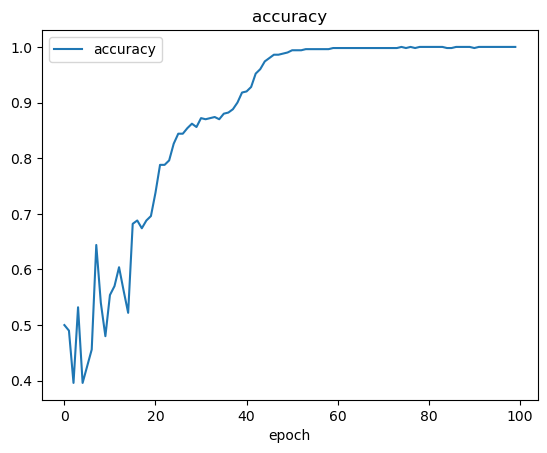

In [43]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

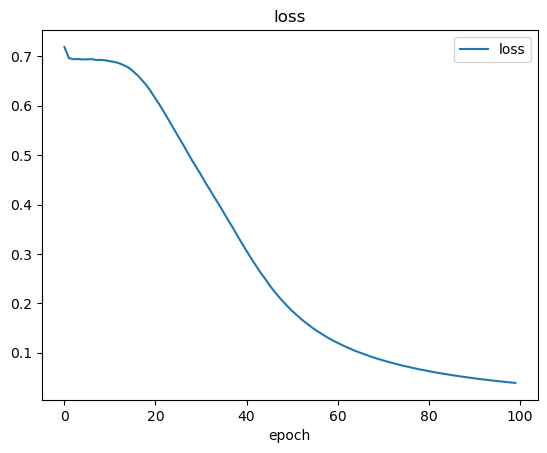

In [44]:
# plot loss function results
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [45]:
# function to plot output where X is the dataset, y is the labelled matrix data, and model is the sequential model
# correlates each specific coordinate with its respecitve preduction probability and plots contour zones 
# yellow = 1 purple = 0 
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25)
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25)
    # return coordinate matricies from the input of the coordinate vectors
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_,yy_]
    pred_func = model.predict(grid)
    Z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, Z)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step


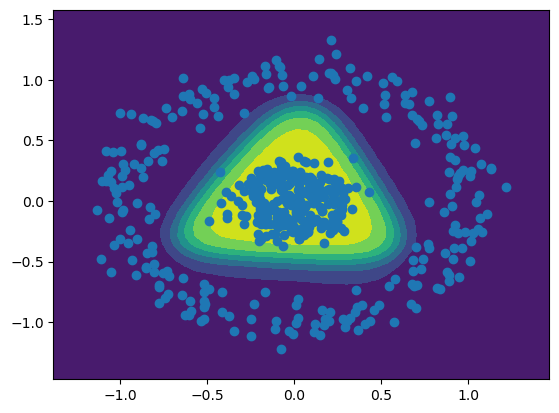

In [47]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediciton is: [[0.03394279]]


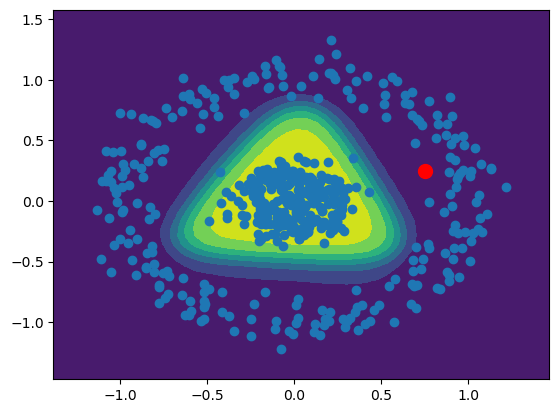

In [49]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x= 0.75
y = 0.25
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x],[y], marker = 'o', markersize = 10, color = 'red')
print("Prediciton is:", prediction)